In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Bitcoin/GENERAL_FINBERT_BTC_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,0.059485,0.018813,0.921702,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,0.048735,0.226959,0.724306,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,0.095558,0.019571,0.884871,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,0.234489,0.015931,0.749580,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,0.234489,0.015931,0.749580,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,0.038350,0.080607,0.881043,36573.183594,36624.359375,35482.132812,37795577489


In [3]:
date1 = []
for i in range(0,1952):
  if np.isnan(stock_data.positive[i]):
    date1.append(stock_data.Date[i])
print(date1)

[]


In [5]:
len(date1)

0

# Executive

In [7]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Bitcoin/EXEC_FINBERT_BTC_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,NaN,NaN,NaN,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,NaN,NaN,NaN,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,NaN,NaN,NaN,36573.183594,36624.359375,35482.132812,37795577489


In [8]:
date2 = []
for i in range(0,1952):
  if np.isnan(stock_data.positive[i]):
    date2.append(stock_data.Date[i])
print(date2)

['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25', '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-02', '2017-03-03', '2017-03-04', '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-10', '2017-03-11', '2017-03-12', '2017-03-13', '2017-03-14', '2017

In [9]:
for d in date1:
  for i in range (0,1952):
    if d == stock_data.Date[i]:
      stock_data.positive[i] = np.nan
      stock_data.negative[i] = np.nan
      stock_data.neutral[i] = np.nan
for d in date2:
  for i in range (0,1952):
    if d == stock_data.Date[i]:
      stock_data.positive[i] = np.nan
      stock_data.negative[i] = np.nan
      stock_data.neutral[i] = np.nan
            
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,NaN,NaN,NaN,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,NaN,NaN,NaN,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,NaN,NaN,NaN,36573.183594,36624.359375,35482.132812,37795577489


In [10]:
len(date2)

1710

In [ ]:
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,NaN,NaN,NaN,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,NaN,NaN,NaN,39695.746094,39789.281250,35856.515625,43106256317


In [ ]:
stock_data.shape

(1953, 8)

In [ ]:
stock_data.isna().any()

Close       False
negative     True
neutral      True
positive     True
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.053084,0.023169,0.923746,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.053084,0.023169,0.923746,39695.746094,39789.281250,35856.515625,43106256317


In [ ]:
stock_data.isna().any()

Close       False
negative     True
neutral      True
positive     True
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data = stock_data.dropna()

In [ ]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-03-01,1222.500000,0.071721,0.012185,0.916093,1180.040039,1222.500000,1179.689941,229056992
2017-03-02,1251.010010,0.072890,0.013520,0.913590,1224.680054,1262.130005,1215.619995,368275008
2017-03-03,1274.989990,0.074059,0.014855,0.911086,1250.709961,1280.310059,1250.709961,315739008
2017-03-04,1255.150024,0.075228,0.016189,0.908582,1277.430054,1279.400024,1230.510010,183270000
2017-03-05,1267.119995,0.076397,0.017524,0.906078,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.053084,0.023169,0.923746,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.053084,0.023169,0.923746,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.053084,0.023169,0.923746,39695.746094,39789.281250,35856.515625,43106256317


In [ ]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1.894000e+03
mean,17673.083469,0.112964,0.131867,0.755169,17657.361769,18121.951656,17143.908395,2.215637e+10
std,17653.151092,0.139714,0.181802,0.208844,17656.995975,18112.321604,17128.395025,2.063342e+10
min,937.520020,0.007380,0.008560,0.018575,936.539978,975.760986,903.713013,1.341270e+08
25%,6363.762329,0.042907,0.025875,0.670035,6358.662354,6483.862427,6265.244873,5.191153e+09
50%,9235.087402,0.060395,0.043378,0.844414,9227.435059,9375.114746,9047.752930,1.842628e+10
75%,32353.070801,0.114335,0.157979,0.911698,32301.350098,33420.408203,31112.503906,3.307144e+10
max,67566.828125,0.921006,0.970479,0.951467,67549.734375,68789.625000,66382.062500,3.509679e+11


In [ ]:
stock_data= stock_data.astype({"Volume":'float'})

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 2017-03-01 to 2022-05-07
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1894 non-null   float64
 1   negative  1894 non-null   float64
 2   neutral   1894 non-null   float64
 3   positive  1894 non-null   float64
 4   Open      1894 non-null   float64
 5   High      1894 non-null   float64
 6   Low       1894 non-null   float64
 7   Volume    1894 non-null   float64
dtypes: float64(8)
memory usage: 133.2+ KB


In [ ]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1514
Number of records in Test Data: 380


In [ ]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [ ]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-03-02     1251.010010
2017-03-03     1274.989990
2017-03-04     1255.150024
2017-03-05     1267.119995
2017-03-06     1272.829956
                  ...     
2022-05-03    37750.453125
2022-05-04    39698.371094
2022-05-05    36575.140625
2022-05-06    36040.921875
2022-05-07    35501.953125
Name: Close, Length: 1893, dtype: float64

In [ ]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.913590,0.914841,0.915467,0.915759,...,0.071797,0.013520,0.012853,0.012519,0.012363,0.012272,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.911086,0.912964,0.914372,0.915136,...,0.071943,0.014855,0.013854,0.013103,0.012696,0.012438,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.908582,0.910773,0.912924,0.914262,...,0.072155,0.016189,0.015022,0.013875,0.013161,0.012680,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906078,0.908426,0.911213,0.913171,...,0.072428,0.017524,0.016273,0.014787,0.013743,0.012993,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.903575,0.906000,0.909303,0.911892,...,0.072760,0.018859,0.017566,0.015805,0.014425,0.013371,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.923746,0.626317,0.563005,0.561380,...,0.069276,0.023169,0.326986,0.381254,0.376582,0.319951,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.923746,0.775032,0.653190,0.609696,...,0.068232,0.023169,0.175078,0.291733,0.329460,0.300804,3.675440e+10,37748.011719,39902.949219,37732.058594
2022-05-05,36575.140625,37740.509718,38246.368897,38865.290226,39970.947027,36040.921875,0.923746,0.849389,0.720829,0.651569,...,0.067254,0.023169,0.099124,0.224592,0.288621,0.282892,4.310626e+10,39695.746094,39789.281250,35856.515625


In [ ]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.913590,0.914841,0.915467,0.915759,...,0.071797,0.013520,0.012853,0.012519,0.012363,0.012272,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.911086,0.912964,0.914372,0.915136,...,0.071943,0.014855,0.013854,0.013103,0.012696,0.012438,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.908582,0.910773,0.912924,0.914262,...,0.072155,0.016189,0.015022,0.013875,0.013161,0.012680,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906078,0.908426,0.911213,0.913171,...,0.072428,0.017524,0.016273,0.014787,0.013743,0.012993,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.903575,0.906000,0.909303,0.911892,...,0.072760,0.018859,0.017566,0.015805,0.014425,0.013371,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.177683,0.328888,0.442758,0.505632,...,0.070393,0.805631,0.630803,0.500616,0.430953,0.340419,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.923746,0.626317,0.563005,0.561380,...,0.069276,0.023169,0.326986,0.381254,0.376582,0.319951,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.923746,0.775032,0.653190,0.609696,...,0.068232,0.023169,0.175078,0.291733,0.329460,0.300804,3.675440e+10,37748.011719,39902.949219,37732.058594


In [ ]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-03-02     1274.989990
2017-03-03     1255.150024
2017-03-04     1267.119995
2017-03-05     1272.829956
2017-03-06     1223.540039
                  ...     
2022-05-02    37750.453125
2022-05-03    39698.371094
2022-05-04    36575.140625
2022-05-05    36040.921875
2022-05-06    35501.953125
Name: close_price_shifted, Length: 1892, dtype: float64

In [ ]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.913590,0.914841,0.915467,0.915759,...,0.071797,0.013520,0.012853,0.012519,0.012363,0.012272,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.911086,0.912964,0.914372,0.915136,...,0.071943,0.014855,0.013854,0.013103,0.012696,0.012438,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.908582,0.910773,0.912924,0.914262,...,0.072155,0.016189,0.015022,0.013875,0.013161,0.012680,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.906078,0.908426,0.911213,0.913171,...,0.072428,0.017524,0.016273,0.014787,0.013743,0.012993,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.903575,0.906000,0.909303,0.911892,...,0.072760,0.018859,0.017566,0.015805,0.014425,0.013371,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.177683,0.328888,0.442758,0.505632,...,0.070393,0.805631,0.630803,0.500616,0.430953,0.340419,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.923746,0.626317,0.563005,0.561380,...,0.069276,0.023169,0.326986,0.381254,0.376582,0.319951,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.923746,0.775032,0.653190,0.609696,...,0.068232,0.023169,0.175078,0.291733,0.329460,0.300804,3.675440e+10,37748.011719,39902.949219,37732.058594


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 1251.01000977,  1236.75500488,  1229.62750244, ...,
          1224.68005371,  1262.13000488,  1215.61999512],
        [ 1274.98999023,  1255.87249756,  1240.96812439, ...,
          1250.70996094,  1280.31005859,  1250.70996094],
        [ 1255.15002441,  1255.51126099,  1244.5135994 , ...,
          1277.43005371,  1279.40002441,  1230.51000977],
        ...,
        [39698.37109375, 38905.87881164, 38803.44498823, ...,
         37748.01171875, 39902.94921875, 37732.05859375],
        [36575.140625  , 37740.50971832, 38246.36889742, ...,
         39695.74609375, 39789.28125   , 35856.515625  ],
        [36040.921875  , 36890.71579666, 37695.00714182, ...,
         36573.18359375, 36624.359375  , 35482.1328125 ]]),
 array([[ 1274.98999023],
        [ 1255.15002441],
        [ 1267.11999512],
        ...,
        [36575.140625  ],
        [36040.921875  ],
        [35501.953125  ]]))

In [ ]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1514, 25) and y: (1514, 1)
Number of rows and columns in the Test set X: (377, 25) and y: (377, 1)


In [ ]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [ ]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1514, 25, 1)
Shape of Test set X: (377, 25, 1)


# Model

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf 
import random
import os
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model2=Sequential()
model2.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model2.add(Dropout(0.4))
model2.add((GRU(200,return_sequences=True,activation='tanh')))
model2.add(Dropout(0.4))
model2.add((GRU(150,activation='tanh', return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation = 'linear'))

# printing the model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 25, 250)           189750    
                                                                 
 dropout (Dropout)           (None, 25, 250)           0         
                                                                 
 gru_1 (GRU)                 (None, 25, 200)           271200    
                                                                 
 dropout_1 (Dropout)         (None, 25, 200)           0         
                                                                 
 gru_2 (GRU)                 (None, 25, 150)           158400    
                                                                 
 dropout_2 (Dropout)         (None, 25, 150)           0         
                                                                 
 flatten (Flatten)           (None, 3750)              0

In [ ]:
import tensorflow as tf

model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
86/86 [==============================] - 21s 163ms/step - loss: 0.0999 - val_loss: 2.8914
Epoch 2/250
86/86 [==============================] - 13s 146ms/step - loss: 0.0224 - val_loss: 0.7825
Epoch 3/250
86/86 [==============================] - 13s 148ms/step - loss: 0.0104 - val_loss: 0.4105
Epoch 4/250
86/86 [==============================] - 13s 148ms/step - loss: 0.0103 - val_loss: 0.6225
Epoch 5/250
86/86 [==============================] - 13s 148ms/step - loss: 0.0131 - val_loss: 0.6165
Epoch 6/250
86/86 [==============================] - 14s 157ms/step - loss: 0.0139 - val_loss: 0.5334
Epoch 7/250
86/86 [==============================] - 13s 146ms/step - loss: 0.0097 - val_loss: 0.4559
Epoch 8/250
86/86 [==============================] - 13s 149ms/step - loss: 0.0105 - val_loss: 0.3567
Epoch 9/250
86/86 [==============================] - 14s 158ms/step - loss: 0.0088 - val_loss: 0.3760
Epoch 10/250
86/86 [==============================] - 15s 173ms/step - loss: 0.010

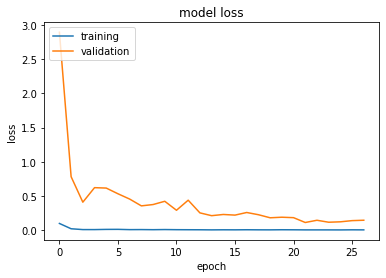

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictions2 = model2.predict(X_test) 

# unscaling the predictions
predictions2 = scaler_y.inverse_transform(np.array(predictions2).reshape((len(predictions2), 1)))

# printing the predictions
print('Predictions:')
predictions2

Predictions:


array([[49188.516],
       [50561.13 ],
       [51034.03 ],
       [51054.75 ],
       [51010.57 ],
       [52156.387],
       [52367.016],
       [52173.07 ],
       [52304.824],
       [51923.12 ],
       [52544.715],
       [52685.32 ],
       [53005.094],
       [53424.49 ],
       [53315.484],
       [52918.676],
       [52137.836],
       [50454.6  ],
       [49978.8  ],
       [48793.977],
       [47671.26 ],
       [46795.504],
       [45604.43 ],
       [43955.79 ],
       [43001.42 ],
       [39935.06 ],
       [40732.055],
       [39559.793],
       [39006.742],
       [39464.97 ],
       [39378.99 ],
       [39424.703],
       [38773.113],
       [37824.418],
       [36890.047],
       [36686.715],
       [37182.676],
       [37079.098],
       [37372.2  ],
       [37806.105],
       [37263.297],
       [36502.266],
       [35957.81 ],
       [35184.695],
       [35275.67 ],
       [36377.03 ],
       [36435.414],
       [36373.27 ],
       [36177.086],
       [37273.816],


# GENERAL

In [ ]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/Bitcoin/GENERAL_FINBERT_BTC_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,0.059485,0.018813,0.921702,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,0.048735,0.226959,0.724306,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,0.095558,0.019571,0.884871,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,0.234489,0.015931,0.749580,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,0.234489,0.015931,0.749580,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,0.038350,0.080607,0.881043,36573.183594,36624.359375,35482.132812,37795577489


In [ ]:
for d in date1:
  for i in range (0,1952):
    if d == stock_data.Date[i]:
      stock_data.positive[i] = np.nan
      stock_data.negative[i] = np.nan
      stock_data.neutral[i] = np.nan
for d in date2:
  for i in range (0,1952):
    if d == stock_data.Date[i]:
      stock_data.positive[i] = np.nan
      stock_data.negative[i] = np.nan
      stock_data.neutral[i] = np.nan
            
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.03835,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,NaN,NaN,NaN,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,NaN,NaN,NaN,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,NaN,NaN,NaN,36573.183594,36624.359375,35482.132812,37795577489


In [ ]:
# setting the column 'Date' as the index column
#stock_data.set_index('Date', inplace=True)
# displaying the stock_data
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.03835,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,NaN,NaN,NaN,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,NaN,NaN,NaN,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,NaN,NaN,NaN,36573.183594,36624.359375,35482.132812,37795577489


In [ ]:
stock_data.shape

(1953, 9)

In [ ]:
stock_data.isna().any()

Date        False
Close       False
negative     True
neutral      True
positive     True
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-01-01,998.325012,NaN,NaN,NaN,963.658020,1003.080017,958.698975,147775008
1,2017-01-02,1021.750000,NaN,NaN,NaN,998.617004,1031.390015,996.702026,222184992
2,2017-01-03,1043.839966,NaN,NaN,NaN,1021.599976,1044.079956,1021.599976,185168000
3,2017-01-04,1154.729980,NaN,NaN,NaN,1044.400024,1159.420044,1044.400024,344945984
4,2017-01-05,1013.380005,NaN,NaN,NaN,1156.729980,1191.099976,910.416992,510199008
...,...,...,...,...,...,...,...,...,...
1948,2022-05-03,37750.453125,0.03835,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
1949,2022-05-04,39698.371094,0.03835,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
1950,2022-05-05,36575.140625,0.03835,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317
1951,2022-05-06,36040.921875,0.03835,0.080607,0.881043,36573.183594,36624.359375,35482.132812,37795577489


In [ ]:
stock_data.isna().any()

Date        False
Close       False
negative     True
neutral      True
positive     True
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)
stock_data = stock_data.dropna()
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-03-01,1222.500000,0.075622,0.033795,0.890584,1180.040039,1222.500000,1179.689941,229056992
2017-03-02,1251.010010,0.069462,0.122135,0.808404,1224.680054,1262.130005,1215.619995,368275008
2017-03-03,1274.989990,0.063302,0.210475,0.726223,1250.709961,1280.310059,1250.709961,315739008
2017-03-04,1255.150024,0.057142,0.298815,0.644043,1277.430054,1279.400024,1230.510010,183270000
2017-03-05,1267.119995,0.050982,0.387155,0.561863,1254.290039,1267.290039,1238.060059,134127000
...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,0.038350,0.080607,0.881043,38528.109375,38629.996094,37585.621094,27326943244
2022-05-04,39698.371094,0.038350,0.080607,0.881043,37748.011719,39902.949219,37732.058594,36754404490
2022-05-05,36575.140625,0.038350,0.080607,0.881043,39695.746094,39789.281250,35856.515625,43106256317


In [ ]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1.894000e+03
mean,17673.083469,0.082861,0.090886,0.826253,17657.361769,18121.951656,17143.908395,2.215637e+10
std,17653.151092,0.039354,0.079762,0.081792,17656.995975,18112.321604,17128.395025,2.063342e+10
min,937.520020,0.026342,0.018344,0.233142,936.539978,975.760986,903.713013,1.341270e+08
25%,6363.762329,0.054773,0.042325,0.783391,6358.662354,6483.862427,6265.244873,5.191153e+09
50%,9235.087402,0.072632,0.070052,0.841540,9227.435059,9375.114746,9047.752930,1.842628e+10
75%,32353.070801,0.097822,0.119815,0.885313,32301.350098,33420.408203,31112.503906,3.307144e+10
max,67566.828125,0.310936,0.740516,0.932347,67549.734375,68789.625000,66382.062500,3.509679e+11


In [ ]:
stock_data= stock_data.astype({"Volume":'float'})

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 2017-03-01 to 2022-05-07
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1894 non-null   float64
 1   negative  1894 non-null   float64
 2   neutral   1894 non-null   float64
 3   positive  1894 non-null   float64
 4   Open      1894 non-null   float64
 5   High      1894 non-null   float64
 6   Low       1894 non-null   float64
 7   Volume    1894 non-null   float64
dtypes: float64(8)
memory usage: 133.2+ KB


In [ ]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1514
Number of records in Test Data: 380


In [ ]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [ ]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-03-02     1251.010010
2017-03-03     1274.989990
2017-03-04     1255.150024
2017-03-05     1267.119995
2017-03-06     1272.829956
                  ...     
2022-05-03    37750.453125
2022-05-04    39698.371094
2022-05-05    36575.140625
2022-05-06    36040.921875
2022-05-07    35501.953125
Name: Close, Length: 1893, dtype: float64

In [ ]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.808404,0.849494,0.870039,0.879627,...,0.075224,0.122135,0.077965,0.055880,0.045573,0.039494,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.726223,0.787859,0.834085,0.859173,...,0.074455,0.210475,0.144220,0.094528,0.067560,0.050525,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.644043,0.715951,0.786575,0.830489,...,0.073338,0.298815,0.221517,0.145600,0.098394,0.066544,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.561863,0.638907,0.730397,0.794672,...,0.071896,0.387155,0.304336,0.205989,0.136896,0.087228,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.479683,0.559295,0.667718,0.752673,...,0.070149,0.475495,0.389916,0.273365,0.182042,0.112278,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.881043,0.856296,0.852926,0.864160,...,0.056295,0.080607,0.085899,0.083915,0.076144,0.071228,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.881043,0.868669,0.859956,0.866411,...,0.055137,0.080607,0.083253,0.083088,0.076739,0.071833,3.675440e+10,37748.011719,39902.949219,37732.058594
2022-05-05,36575.140625,37740.509718,38246.368897,38865.290226,39970.947027,36040.921875,0.881043,0.874856,0.865227,0.868362,...,0.054054,0.080607,0.081930,0.082468,0.077255,0.072399,4.310626e+10,39695.746094,39789.281250,35856.515625


In [ ]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.808404,0.849494,0.870039,0.879627,...,0.075224,0.122135,0.077965,0.055880,0.045573,0.039494,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.726223,0.787859,0.834085,0.859173,...,0.074455,0.210475,0.144220,0.094528,0.067560,0.050525,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.644043,0.715951,0.786575,0.830489,...,0.073338,0.298815,0.221517,0.145600,0.098394,0.066544,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.561863,0.638907,0.730397,0.794672,...,0.071896,0.387155,0.304336,0.205989,0.136896,0.087228,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.479683,0.559295,0.667718,0.752673,...,0.070149,0.475495,0.389916,0.273365,0.182042,0.112278,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.830262,0.831548,0.843554,0.861562,...,0.057532,0.091850,0.091192,0.085017,0.075457,0.070581,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.881043,0.856296,0.852926,0.864160,...,0.056295,0.080607,0.085899,0.083915,0.076144,0.071228,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.881043,0.868669,0.859956,0.866411,...,0.055137,0.080607,0.083253,0.083088,0.076739,0.071833,3.675440e+10,37748.011719,39902.949219,37732.058594


In [ ]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-03-02     1274.989990
2017-03-03     1255.150024
2017-03-04     1267.119995
2017-03-05     1272.829956
2017-03-06     1223.540039
                  ...     
2022-05-02    37750.453125
2022-05-03    39698.371094
2022-05-04    36575.140625
2022-05-05    36040.921875
2022-05-06    35501.953125
Name: close_price_shifted, Length: 1892, dtype: float64

In [ ]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,1251.010010,1236.755005,1229.627502,1226.301335,1224.339355,1274.989990,0.808404,0.849494,0.870039,0.879627,...,0.075224,0.122135,0.077965,0.055880,0.045573,0.039494,3.682750e+08,1224.680054,1262.130005,1215.619995
2017-03-03,1274.989990,1255.872498,1240.968124,1232.793155,1227.607138,1255.150024,0.726223,0.787859,0.834085,0.859173,...,0.074455,0.210475,0.144220,0.094528,0.067560,0.050525,3.157390e+08,1250.709961,1280.310059,1250.709961
2017-03-04,1255.150024,1255.511261,1244.513599,1235.774071,1229.384099,1267.119995,0.644043,0.715951,0.786575,0.830489,...,0.073338,0.298815,0.221517,0.145600,0.098394,0.066544,1.832700e+08,1277.430054,1279.400024,1230.510010
2017-03-05,1267.119995,1261.315628,1250.165198,1239.953528,1231.818673,1272.829956,0.561863,0.638907,0.730397,0.794672,...,0.071896,0.387155,0.304336,0.205989,0.136896,0.087228,1.341270e+08,1254.290039,1267.290039,1238.060059
2017-03-06,1272.829956,1267.072792,1255.831388,1244.337052,1234.464562,1223.540039,0.479683,0.559295,0.667718,0.752673,...,0.070149,0.475495,0.389916,0.273365,0.182042,0.112278,1.536570e+08,1267.469971,1276.000000,1264.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,38529.328125,38476.319934,38756.697340,39357.998793,40411.789300,37750.453125,0.830262,0.831548,0.843554,0.861562,...,0.057532,0.091850,0.091192,0.085017,0.075457,0.070581,3.292264e+10,38472.187500,39074.972656,38156.562500
2022-05-03,37750.453125,38113.386530,38505.136286,39143.659371,40240.090192,39698.371094,0.881043,0.856296,0.852926,0.864160,...,0.056295,0.080607,0.085899,0.083915,0.076144,0.071228,2.732694e+10,38528.109375,38629.996094,37585.621094
2022-05-04,39698.371094,38905.878812,38803.444988,39217.620934,40205.140572,36575.140625,0.881043,0.868669,0.859956,0.866411,...,0.055137,0.080607,0.083253,0.083088,0.076739,0.071833,3.675440e+10,37748.011719,39902.949219,37732.058594


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 1251.01000977,  1236.75500488,  1229.62750244, ...,
          1224.68005371,  1262.13000488,  1215.61999512],
        [ 1274.98999023,  1255.87249756,  1240.96812439, ...,
          1250.70996094,  1280.31005859,  1250.70996094],
        [ 1255.15002441,  1255.51126099,  1244.5135994 , ...,
          1277.43005371,  1279.40002441,  1230.51000977],
        ...,
        [39698.37109375, 38905.87881164, 38803.44498823, ...,
         37748.01171875, 39902.94921875, 37732.05859375],
        [36575.140625  , 37740.50971832, 38246.36889742, ...,
         39695.74609375, 39789.28125   , 35856.515625  ],
        [36040.921875  , 36890.71579666, 37695.00714182, ...,
         36573.18359375, 36624.359375  , 35482.1328125 ]]),
 array([[ 1274.98999023],
        [ 1255.15002441],
        [ 1267.11999512],
        ...,
        [36575.140625  ],
        [36040.921875  ],
        [35501.953125  ]]))

In [ ]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1514, 25) and y: (1514, 1)
Number of rows and columns in the Test set X: (377, 25) and y: (377, 1)


In [ ]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [ ]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1514, 25, 1)
Shape of Test set X: (377, 25, 1)


# Model

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf
import random 
import os
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model1=Sequential()
model1.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model1.add(Dropout(0.4))
model1.add((GRU(200,return_sequences=True,activation='tanh')))
model1.add(Dropout(0.4))
model1.add((GRU(150,activation='tanh', return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(1, activation = 'linear'))

# printing the model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 25, 250)           189750    
                                                                 
 dropout_3 (Dropout)         (None, 25, 250)           0         
                                                                 
 gru_4 (GRU)                 (None, 25, 200)           271200    
                                                                 
 dropout_4 (Dropout)         (None, 25, 200)           0         
                                                                 
 gru_5 (GRU)                 (None, 25, 150)           158400    
                                                                 
 dropout_5 (Dropout)         (None, 25, 150)           0         
                                                                 
 flatten_1 (Flatten)         (None, 3750)             

In [ ]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
86/86 [==============================] - 21s 167ms/step - loss: 0.1138 - val_loss: 4.5430
Epoch 2/250
86/86 [==============================] - 13s 153ms/step - loss: 0.0294 - val_loss: 1.3235
Epoch 3/250
86/86 [==============================] - 13s 153ms/step - loss: 0.0088 - val_loss: 0.3474
Epoch 4/250
86/86 [==============================] - 15s 176ms/step - loss: 0.0094 - val_loss: 0.4671
Epoch 5/250
86/86 [==============================] - 13s 148ms/step - loss: 0.0084 - val_loss: 0.3665
Epoch 6/250
86/86 [==============================] - 14s 158ms/step - loss: 0.0067 - val_loss: 0.3147
Epoch 7/250
86/86 [==============================] - 13s 155ms/step - loss: 0.0076 - val_loss: 0.3064
Epoch 8/250
86/86 [==============================] - 13s 150ms/step - loss: 0.0069 - val_loss: 0.3255
Epoch 9/250
86/86 [==============================] - 13s 152ms/step - loss: 0.0065 - val_loss: 0.2908
Epoch 10/250
86/86 [==============================] - 13s 152ms/step - loss: 0.008

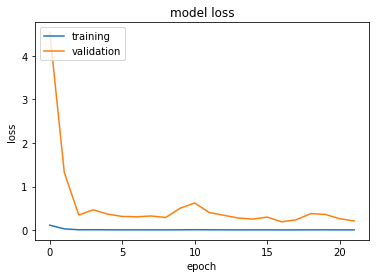

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictions1 = model1.predict(X_test) 

# unscaling the predictions
predictions1 = scaler_y.inverse_transform(np.array(predictions1).reshape((len(predictions1), 1)))

# printing the predictions
print('Predictions:')
predictions1

Predictions:


array([[47453.51 ],
       [48656.73 ],
       [49054.387],
       [49064.887],
       [49054.08 ],
       [50133.477],
       [50300.434],
       [50132.97 ],
       [50248.574],
       [49973.613],
       [50607.52 ],
       [50752.66 ],
       [51092.324],
       [51500.133],
       [51419.324],
       [51087.023],
       [50371.418],
       [48833.992],
       [48426.742],
       [47204.67 ],
       [46125.516],
       [45295.445],
       [44188.777],
       [42592.668],
       [41759.543],
       [41050.758],
       [39589.344],
       [38350.08 ],
       [37833.223],
       [38218.168],
       [38106.92 ],
       [38120.49 ],
       [37480.4  ],
       [36556.453],
       [35642.617],
       [35409.61 ],
       [35823.77 ],
       [35674.066],
       [35921.28 ],
       [36272.453],
       [35730.7  ],
       [35000.477],
       [34454.445],
       [33709.887],
       [33839.062],
       [34831.254],
       [35116.18 ],
       [35305.27 ],
       [35381.473],
       [36639.96 ],


## Unscaling

In [ ]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

## Plotting

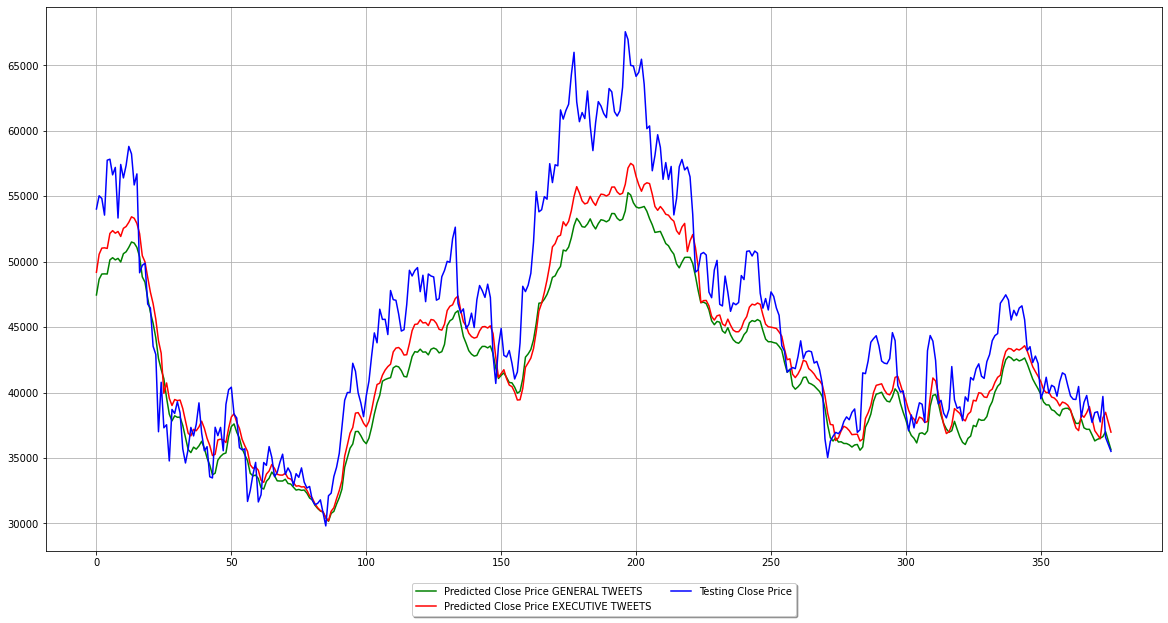

In [ ]:

plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions1,'-g', label="Predicted Close Price GENERAL TWEETS")
plt.plot(predictions2,'-r', label="Predicted Close Price EXECUTIVE TWEETS")
plt.plot([row[0] for row in y_test],color = 'b', label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE general",mean_absolute_error(y_test,predictions1))
print("MAE executive",mean_absolute_error(y_test,predictions2))

MAE general 3676.0061961206898
MAE executive 2842.190717216512


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE1 = np.square(np.subtract(y_test,predictions1)).mean() 
MSE2 = np.square(np.subtract(y_test,predictions2)).mean() 

print("MSE general",MSE1)
print("MSE executive",MSE2)

RMSE1 = MSE1
RMSE2 = MSE2

print('Root Mean Square Error General Tweets (sklearn.metrics) =', round(np.sqrt(RMSE1),4))
print('Root Mean Square Error Executive Tweets (sklearn.metrics) =', round(np.sqrt(RMSE2),4))

MSE general 21447806.514719024
MSE executive 13540255.115274314
Root Mean Square Error General Tweets (sklearn.metrics) = 4631.1777
Root Mean Square Error Executive Tweets (sklearn.metrics) = 3679.7086


In [ ]:
from sklearn.metrics import r2_score
r2 =[ r2_score(y_test,predictions1), r2_score(y_test,predictions2)]
print('R2 general',r2[0])
print('R2 executive',r2[1])

R2 general 0.7061439809127192
R2 executive 0.8144852032831374


In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
print("MAPE General",MAPE(y_test,predictions1), "%")
print("MAPE Executive",MAPE(y_test,predictions2), "%")

MAPE General 7.492450769322259 %
MAPE Executive 5.8306180421711336 %


# Conclusion

Executive is better

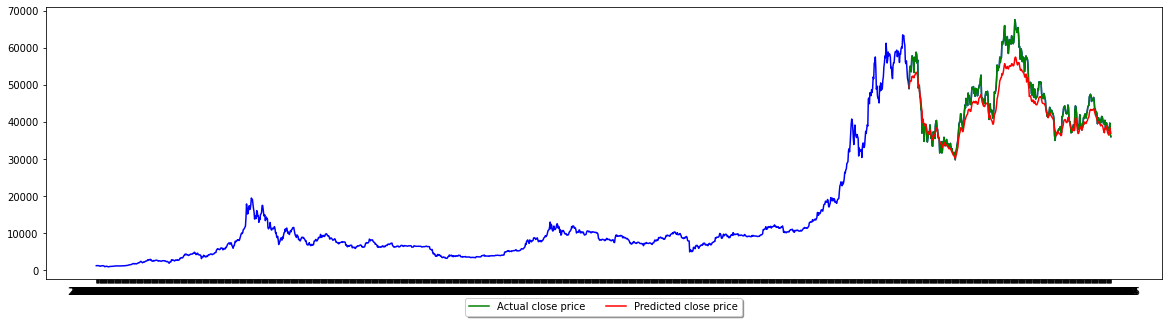

In [ ]:
val = data[len(y_train)+1:]
val['pred'] = predictions2
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'g')
plt.plot(val['pred'], label = 'Predicted close price', color = 'r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()